# Statistics Mini Project

In [99]:
# import 'pandas' 
import pandas as pd 

# import 'numpy' 
import numpy as np

# import subpackage of matplotlib
import matplotlib.pyplot as plt

# import 'seaborn'
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# import 'stats' package from scipy library
from scipy import stats

# import statistics to perform statistical computations
import statistics

# to test the normality 
from scipy.stats import shapiro

# import the functions to perform Chi-square tests
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare

# import a library to perform Z-test
from statsmodels.stats import weightstats as stests

# function to perform post-hoc test
import statsmodels.stats.multicomp as mc

# function to perform non-parametric tests
from scipy.stats import wilcoxon
from scipy.stats import ranksums

In [100]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [10,5]

__A. You were recently hired as a business analyst in a top sports company. The senior management team has asked you to come up with metrics with which they can gauge which team will win the upcoming La Liga cup (Football tournament). The given data set contains information on all the teams that have so far participated in all the past tournaments. It has data about how many goals each team scored, conceded; how many times they came within the first 6 positions, how many seasons they have qualified, their best position in the past, etc. You are required to do the following:__

__Before doing any analysis it would be a good idea to check for any hypens or other symbols the data set and make appropriate replacements to make sure you can perform arithmetic operations on the data. Prepare a short report to answer the following questions:__

In [101]:
laliga=pd.read_csv(r'C:\Users\Kritika\OneDrive\Desktop\Great Lakes\Statistics\Mini Project\Laliga.csv',header=1)
laliga.head(5)

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
0,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
1,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
2,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002-03,1
3,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931-32,1987-88,1
4,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,49,1929,1929,1


In [102]:
#Checking for the null values present in columns
laliga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Pos            61 non-null     int64 
 1   Team           61 non-null     object
 2   Seasons        61 non-null     int64 
 3   Points         61 non-null     object
 4   GamesPlayed    61 non-null     object
 5   GamesWon       61 non-null     object
 6   GamesDrawn     61 non-null     object
 7   GamesLost      61 non-null     object
 8   GoalsFor       61 non-null     object
 9   GoalsAgainst   61 non-null     object
 10  Champion       61 non-null     object
 11  Runner-up      61 non-null     object
 12  Third          61 non-null     object
 13  Fourth         61 non-null     object
 14  Fifth          61 non-null     object
 15  Sixth          61 non-null     object
 16  T              61 non-null     object
 17  Debut          61 non-null     object
 18  Since/LastApp  61 non-null     o

In [103]:
#Checking for hypens or any other symbols in the data set
laliga.head(15)

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
0,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
1,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
2,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002-03,1
3,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931-32,1987-88,1
4,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,49,1929,1929,1
5,6,Sevilla,73,2819,2408,990,531,887,3680,3373,1,4,4,5,12,6,32,1934-35,2001-02,1
6,7,Espanyol,82,2792,2626,948,608,1070,3609,3889,-,-,4,5,2,5,16,1929,1994-95,3
7,8,Real Sociedad,70,2573,2302,864,577,861,3228,3230,2,3,2,5,4,3,19,1929,2010-11,1
8,9,Zaragoza,58,2109,1986,698,522,766,2683,2847,-,1,4,5,4,4,18,1939-40,2012-13,2
9,10,Real Betis,51,1884,1728,606,440,682,2159,2492,1,-,2,3,4,4,14,1932-33,2015-16,1


In [104]:
#Replacing hypens with 0 in the dataset
laliga=laliga.replace('-','0')
laliga.head(15)

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
0,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
1,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
2,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002-03,1
3,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931-32,1987-88,1
4,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,49,1929,1929,1
5,6,Sevilla,73,2819,2408,990,531,887,3680,3373,1,4,4,5,12,6,32,1934-35,2001-02,1
6,7,Espanyol,82,2792,2626,948,608,1070,3609,3889,0,0,4,5,2,5,16,1929,1994-95,3
7,8,Real Sociedad,70,2573,2302,864,577,861,3228,3230,2,3,2,5,4,3,19,1929,2010-11,1
8,9,Zaragoza,58,2109,1986,698,522,766,2683,2847,0,1,4,5,4,4,18,1939-40,2012-13,2
9,10,Real Betis,51,1884,1728,606,440,682,2159,2492,1,0,2,3,4,4,14,1932-33,2015-16,1


__1.	Which are the teams which started playing between 1930-1980?__

In [105]:
for i in range(len(laliga['Debut'])):
    laliga['Debut'][i]=int(laliga['Debut'][i][0:4])

In [106]:
teams=laliga[(laliga['Debut']<1980) & (laliga['Debut']>1930)]['Team']
teams

3                Valencia
5                 Sevilla
8                Zaragoza
9              Real Betis
10    Deportivo La Coruna
11             Celta Vigo
12             Valladolid
14         Sporting Gijon
15                Osasuna
16                 Malaga
17                 Oviedo
18               Mallorca
19             Las Palmas
21                Granada
22         Rayo Vallecano
23                  Elche
25               Hercules
26               Tenerife
27                 Murcia
29                Levante
30              Salamanca
31               Sabadell
32                  Cadiz
34              Castellon
37                Cordoba
39             Recreativo
40              Burgos CF
41             Pontevedra
46              Gimnastic
49               Alcoyano
50                   Jaen
52             AD Almeria
54                 Lleida
57                 Condal
58        Atletico Tetuan
59       Cultural Leonesa
Name: Team, dtype: object

__2.Which are the top 5 teams in terms of points?__

In [107]:
laliga['Points']=laliga['Points'].astype('int64')
laliga[['Team','Points']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Team    61 non-null     object
 1   Points  61 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [108]:
top_5_p=laliga.nlargest(5,'Points')[['Team','Points']]
top_5_p

,Team,Points
0,Real Madrid,4385
1,Barcelona,4262
2,Atletico Madrid,3442
3,Valencia,3386
4,Athletic Bilbao,3368


__3.	What is the distribution of the winning percentage for all teams? Which teams are in the top 5 in terms of winning percentage? (Winning percentage= (GamesWon / GamesPlayed)*100)__

In [109]:
laliga['GamesWon']=laliga['GamesWon'].astype('int64')
laliga['GamesPlayed']=laliga['GamesPlayed'].astype('int64')
laliga[['GamesWon','GamesPlayed']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   GamesWon     61 non-null     int64
 1   GamesPlayed  61 non-null     int64
dtypes: int64(2)
memory usage: 1.1 KB


In [110]:
laliga['Winning_percentage']=(laliga['GamesWon']/laliga['GamesPlayed'])*100

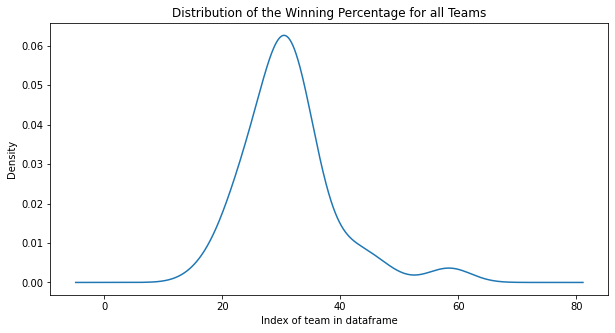

In [111]:
laliga['Winning_percentage'].plot(kind='kde')
plt.title('Distribution of the Winning Percentage for all Teams')
plt.xlabel('Index of team in dataframe')
plt.show()

In [112]:
top_5_wp=laliga.nlargest(5,'Winning_percentage')[['Team','Winning_percentage']]
top_5_wp

,Team,Winning_percentage
0,Real Madrid,59.630702
1,Barcelona,57.241130
2,Atletico Madrid,47.475134
3,Valencia,44.557057
4,Athletic Bilbao,43.772629


__4.	Is there a significant difference in the winning percentage for teams which have attained a best position between 1-3 and those teams which have had a best position between 4-7.__

In [113]:
laliga['BestPosition'].unique()

array([ 1,  3,  2,  4,  6,  8,  5, 11,  7, 12, 10, 17,  9, 19, 14, 16, 20,
       15], dtype=int64)

In [121]:
sample_1=[laliga['Winning_percentage'][i] for i in laliga['BestPosition'].index if laliga['BestPosition'][i] in (1,2,3)]   
sample_2=[laliga['Winning_percentage'][i] for i in laliga['BestPosition'].index if laliga['BestPosition'][i] in (4,5,6,7)]

In [122]:
# Before performing the t-test, we need to check for normality and equality of variance of data

stat, p_value = stats.shapiro(sample_1+sample_2)
print('Shapiro_p-value:', p_value)

stat, p_value = stats.levene(sample_1,sample_2)
print('Levene_P-Value:', p_value)

#Since P_value < 0.05 for both shapiro and levene tests, assumptions for two sample t-test are not satisfied. 
#In this case we need to go to wilcoxin rank sum test (non parameteric test).

Shapiro_p-value: 2.7973458145424956e-06
Levene_P-Value: 0.0055024902317928875


__Wilcoxin rank sum test__

__H0: median1-median2=0__

__H1: median1-median2!=0__

__Let us assume alpha = 0.05__

In [123]:
w,p=ranksums(sample_1,sample_2)
print('P_value for two tailed test is:',p)

# P_value<0.05, so we reject the null hypothesis, therefore there is a significant difference 
#in the winning percentage for teams which have attained a best position between 1-3 and those teams which 
#have had a best position between 4-7.

P_value for two tailed test is: 7.781857739836886e-07


__B. A study was done to measure the blood pressure of 60 year old women with glaucoma. A random sample of 200 60-year old women with glaucoma was chosen. The mean of the systolic blood pressure in the sample was 140 mm Hg and the standard deviation was 25 mm Hg.__

__1. Calculate the estimated standard error of the sample mean? What does the standard error indicate?__

In [67]:
sample_mean=140
sample_std=25
sample_size=200

estimated_se=sample_std/np.sqrt(sample_size)
print("Estimated Standard Error",round(estimated_se,2))

Estimated Standard Error 1.77


Estimated standard error of 1.77 indicates that the sample mean of 140 mm Hg is 1.77mm Hg dispersed from Population mean

__2. Estimate a 95% confidence interval for the true mean blood pressure for all 60-year old women with glaucoma.__

In [69]:
sample_mean=140
sample_std=25
sample_size=200

CI=stats.norm.interval(0.95,loc=sample_mean,scale=sample_std/np.sqrt(sample_size))
print('95% confidence interva for the population mean is',CI)

95% confidence interva for the population mean is (136.5352404391258, 143.4647595608742)


__3. Assume that instead of 200, a random sample of only 100 60-year old women with glaucoma was chosen. The sample mean and standard deviation estimates are the same as those in the original study. What is the estimated 95% confidence interval for the true mean blood pressure?__

In [71]:
sample_mean=140
sample_std=25
sample_size=100

CI_new=stats.norm.interval(0.95,loc=sample_mean,scale=sample_std/np.sqrt(sample_size))
print('95% confidence interval for the population mean is',CI_new)

95% confidence interval for the population mean is (135.10009003864985, 144.89990996135015)


__4. Which of the two above intervals are wider?__

95% confidence interval of sample size 100 for the population mean is wider (135.10009003864985, 144.89990996135015) compared to sample size of 200 (136.5352404391258, 143.4647595608742).

__5. Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size.__

For a given sample size, the estimated standard error of a sample mean equals the standard deviation divided by the square root of the sample size. In other words, the estimated standard error of the sample mean is a measure of the dispersion of sample means around the population mean. So, as the sample size increases, sample means cluster more closely around the population mean which results in decrease in estimated standard error.

__SE=σ/√n__

In the formula,we can observe that a rise in n will lead to an increase in the denominator and keeping the standard deviation constant, this would lead to a fall in th estimated sample error of the sample mean.

__C. Par Inc., is a major manufacturer of golf equipment. Management believes that Par’s market share could be increased with the introduction of a cut-resistant, longer-lasting golf ball. Therefore, the research group at Par has been investigating a new golf ball coating designed to resist cuts and provide a more durable ball. The tests with the coating have been promising.__

__One of the researchers voiced concern about the effect of the new coating on driving distances. Par would like the new cut-resistant ball to offer driving distances comparable to those of the current-model golf ball. To compare the driving distances for the two balls, 40 balls of both the new and current models were subjected to distance tests. The testing was performed with a mechanical hitting machine so that any difference between the mean distances for the two models could be attributed to a difference in the design. The results of the tests, with distances measured to the nearest yard, are contained in   the data set “Golf”.__

In [74]:
golf=pd.read_csv(r'C:\Users\Kritika\OneDrive\Desktop\Great Lakes\Statistics\Mini Project\Golf.csv')
golf.head(5)

,Current,New
0,264,277
1,261,269
2,267,263
3,272,266
4,258,262


__1.Formulate and present the rationale for a hypothesis test that Par could use to compare the driving distances of the current and new golf balls.__

- N = 40 
- Alpha = 0.05
- Population standard deviation (Sigma) is unknown, so we have to use a t Test.
- Degrees of freedom (N+N-2) = 78
- Since the sole purpose of the test is to check whether there is any effect on driving distances of the golf balls due to the   new coating, we could prefer a Two-Tailed t Test.

In [77]:
# Before performing two sample t test , let us check normality and equality of variance test of current and new balls

stat1, p_value1 = shapiro(list(golf['Current'])+list(golf['New']))
print('Normality test P-Value',p_value1)

stat2, p_value2=stats.levene(golf['Current'],golf['New'])
print('Equality of variance test P-Value',p_value2)

#As p_value > 0.05 in case of both normality and equality of variance test ,we can perform a two sample t-test.

Normality test P-Value 0.1566435992717743
Equality of variance test P-Value 0.6147759523331309


The null and alternative hypothesis is:

H<sub>0</sub>: New coating does not have an effect on driving distances <br>
H<sub>1</sub>: New coating does have a significant effect on driving distances <br>

__2.	Analyze the data to provide the hypothesis testing conclusion. What is the p-value for your test? What is your recommendation for Par Inc.?__

In [81]:
# use 'ttest_ind()' to calculate the test statistic and corresponding p-value for 2 sample test
t_stat, p_val = stats.ttest_ind(a = golf['Current'], b = golf['New'])
print('Test Statistic:', t_stat)
print('p-value:', p_val)

t_val = np.abs(round(stats.t.isf(q = 0.05/2, df = 78), 2))
print('Critical value for two-tailed t-test:', t_val)

#t-test statistic < 1.99 & > -1.99 and the p-value > 0.05.
#Thus, we fail to reject the null hypothesis and conclude that new coating does not have an effect on driving distances.

Test Statistic: 1.3283615935245678
p-value: 0.18793228491854663
Critical value for two-tailed t-test: 1.99


My recommendation is that the test should be carried out with a larger sample size covering a number of golf courses to improve the accuracy of the test results and to negate any effect of one type of ground. Also, the results need to interpreted and future actions be planned with the understanding of other characteristics like size, shape, weight etc.

__3.	What is the 95% confidence interval for the population mean of each model, and what is the 95% confidence interval for the difference between the means of the two population?__

In [91]:
#95% confidence interval for the population mean of current model

n1=40
sample_mean1=np.mean(golf['Current'])
sample_std1=statistics.stdev(golf['Current'])

CI_1=stats.norm.interval(0.95,loc=sample_mean1,scale=sample_std1/np.sqrt(n1))
print('95% confidence interval for the mean of the Current Model :',CI_1)

95% confidence interval for the mean of the Current Model : (267.56247173951107, 272.9875282604889)


In [92]:
#95% confidence interval for the population mean of new model

n2=40
sample_mean2=np.mean(golf['New'])
sample_std2=statistics.stdev(golf['New'])

CI_2=stats.norm.interval(0.95,loc=sample_mean2,scale=sample_std2/np.sqrt(n2))
print('95% confidence interval for the mean of the New Model:',CI_2)

95% confidence interval for the mean of the New Model: (264.43297388933604, 270.56702611066396)


In [94]:
# 95% confidence interval for the difference between the means of the two population

std_pooled = np.sqrt((((n1-1)*sample_std1**2) + ((n2-1)*sample_std2**2)) / (n1 + n2 - 2))
CI_3 = stats.t.interval(0.95, df = n1+n2-2, loc = sample_mean1 - sample_mean2, scale = std_pooled * np.sqrt(1/n1 + 1/n2))
print('95% confidence interval for the difference between the means of the two population is', CI_3)

95% confidence interval for the difference between the means of the two population is (-1.3839584057317742, 6.933958405731729)
